In [1]:
# pip install beautifulsoup4
# pip install requests
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
webpage = webpage_response.content
soup = BeautifulSoup(webpage, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

In [54]:
#THIS IS A FUNCTION TO APPEND VALUES FOR EACH ROW ACCORDING TO EACH CLASS FROM CSS IN THE HTML SOUP OBJECT
def scrape_column(class_name):
    column = []
    for i in soup.select('.'+class_name):
        column.append(i.get_text())
    return(column[1:])

# THIS PART IS TO CREATE THE ARRAY OF COLUMNS CATEGORIES
#In this part i look for the headers of the soup object with the 'tr' label, I use
#[2] because when I printed the html object (soup) I noticed that the lists of 
#labels are located in the location [2] in the lists of 'tr's
headers = soup.find_all('tr')[2]
# print(headers)
# class_list = [value for i in headers('td') for value in i['class']]
class_list = []
#The first loop is to select each tag "td" (All the contents from the tag)
#The second loop is to access the value of the class.
#class_list.append(value) is to append all the class values(column heads) in the list
for i in headers('td'):
    # print(i)
    for value in i['class']:
        # print(value)
        class_list.append(value)
print(class_list)

['Company', 'Origin', 'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType', 'BroadBeanOrigin']


In [88]:
d = {}
for i in class_list:
    d[i] = scrape_column(i)
    # print(d[i])
print('\n')
print(d)
#This is useful to call the value of the class we have to change '.text'
#for each bloc of [i] -> [i=0] is the columns, while [i=1] is the first row of data
#You may use this section to do tests and then you can prove the scrape_column function
# company1 = soup.select('.Company')[0]
# origin1 = soup.select('.Origin')[1]
# print(company1)
# print(origin1)
#RESULTS:
#<td class="Company">A. Morin</td>
#<td class="Origin">Agua Grande</td>



{'Company': ['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll

In [96]:
#WE CHECKED THE DICTIONARY 'd' AND UPON THAT ITS IMPORTANT TO USE THE COLUMNS
#REF, REVIEWDATE, RATING BECAUSE THEY ARE NUMERIC VALUES THAT SHOULD BE TRANSFORMED
#FROM STRING TO NUMERIC VALUES WHICH HAVE TO CONSIDER FLOAT BECAUSE OF DECIMALS
df = pd.DataFrame.from_dict(d)
for i in df[['REF', 'ReviewDate', 'Rating']].columns:
    df[i] = pd.to_numeric(df[i])
print(df.head(5))
# print(df['REF'])
# print(df['ReviewDate'])
# print(df['Rating'])

    Company       Origin   REF  ReviewDate CocoaPercent CompanyLocation  \
0  A. Morin  Agua Grande  1876        2016          63%          France   
1  A. Morin        Kpime  1676        2015          70%          France   
2  A. Morin       Atsane  1676        2015          70%          France   
3  A. Morin        Akata  1680        2015          70%          France   
4  A. Morin       Quilla  1704        2015          70%          France   

   Rating BeanType BroadBeanOrigin  
0    3.75                 Sao Tome  
1    2.75                     Togo  
2    3.00                     Togo  
3    3.50                     Togo  
4    3.50                     Peru  


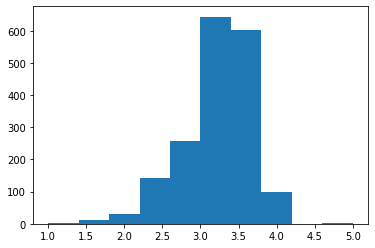

In [102]:
#The histogram of rating: chocolate
ratings = pd.to_numeric(df['Rating'])
plt.hist(ratings)
plt.show()  

In [130]:
df.CocoaPercent = pd.to_numeric(df.CocoaPercent.replace('%', '', regex=True))
df['CocoaPercentage'] = df.CocoaPercent
tidied_df = df[['Company', 'Origin', 'REF', 'ReviewDate', 'CocoaPercentage', 'CompanyLocation', 'Rating', 'BeanType', 'BroadBeanOrigin']]
print(df.CocoaPercent)

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: CocoaPercent, Length: 1795, dtype: float64


In [141]:
top10 = tidied_df.groupby('Company').mean().Rating.nlargest(10)
print(round(top10,2))

Company
Tobago Estate (Pralus)                  4.00
Heirloom Cacao Preservation (Zokoko)    3.88
Ocelot                                  3.88
Amedei                                  3.85
Matale                                  3.81
Patric                                  3.79
Idilio (Felchlin)                       3.78
Acalli                                  3.75
Chocola'te                              3.75
Christopher Morel (Felchlin)            3.75
Name: Rating, dtype: float64


                                CocoaPercentage  Rating
Company                                                
Bouga Cacao (Tulicorp)                    88.50    2.38
Chocolate Alchemist-Philly                85.00    2.50
Garden Island                             85.00    2.50
Lindt & Sprungli                          85.00    3.00
Nanea                                     85.00    3.50
Vintage Plantations (Tulicorp)            82.50    2.50
Claudio Corallo                           82.12    2.94
Durand                                    82.00    2.75
Peppalo                                   82.00    3.00
Marsatta                                  81.50    2.38


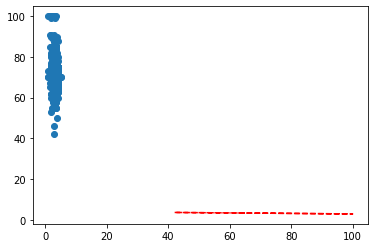

<Figure size 432x288 with 0 Axes>

In [154]:
cocoapercentage_rating = tidied_df.groupby('Company').mean()[['CocoaPercentage', 'Rating']].nlargest(10, columns= 'CocoaPercentage')
print(round(cocoapercentage_rating, 2))

plt.scatter(tidied_df.Rating, tidied_df.CocoaPercentage)
z = np.polyfit(tidied_df.CocoaPercentage, tidied_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(tidied_df.CocoaPercentage, line_function(tidied_df.CocoaPercentage), "r--")
plt.show()
plt.clf()

In [156]:
best_beans_origin = tidied_df.groupby('BroadBeanOrigin').mean().Rating.nlargest(10)
print(best_beans_origin)

BroadBeanOrigin
Dom. Rep., Madagascar           4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Guat., D.R., Peru, Mad., PNG    4.00
Peru, Dom. Rep                  4.00
Ven, Bolivia, D.R.              4.00
Venezuela, Java                 4.00
DR, Ecuador, Peru               3.75
Dominican Rep., Bali            3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Name: Rating, dtype: float64


In [162]:
best_countries = tidied_df.groupby('CompanyLocation').mean().Rating.nlargest(10)
print(best_countries)

CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Rating, dtype: float64
